In [73]:
# author Xianhui
# date 10/3/2017
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.feature_selection import RFE 
import graphviz
% matplotlib inline

In [93]:
X, y = make_classification(n_features=20, n_samples=1000, n_classes=2, n_informative=5, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
pd.DataFrame([np.bincount(y_train), np.bincount(y)]).transpose()

,0,1
0,381,502
1,369,498


acc score  0.772
roc auc score  0.847748094048
feature importance  [(0.69899999999999995, 17), (0.17799999999999999, 10), (0.123, 5), (0.0, 19), (0.0, 18), (0.0, 16), (0.0, 15), (0.0, 14), (0.0, 13), (0.0, 12), (0.0, 11), (0.0, 9), (0.0, 8), (0.0, 7), (0.0, 6), (0.0, 4), (0.0, 3), (0.0, 2), (0.0, 1), (0.0, 0)]


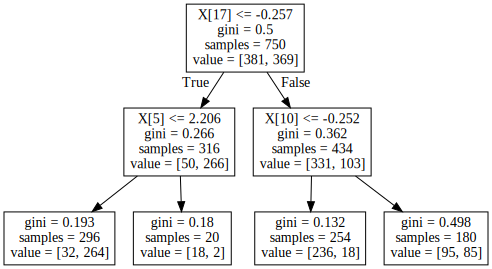

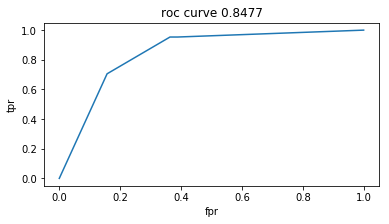

In [96]:
clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)
clf.fit(X_train, y_train)
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

print('acc score ', clf.score(X_test, y_test))
print('roc auc score ', roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))
print('feature importance ', list(reversed(sorted(zip(np.round(clf.feature_importances_, 3), range(X_train.shape[1]))))))
def plot_roc(fpr, tpr):
    # plot roc curve
    plt.figure(figsize=(6, 3))
    plt.plot(fpr, tpr)
    plt.title('roc curve ' + str(np.round(auc(fpr, tpr), 4)))
    plt.xlabel('fpr')
    plt.ylabel('tpr')
plot_roc(fpr, tpr)
# visualize tree model
dot_tree = export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_tree)
graph

In [98]:
# random feature elimination using RFE 
rfe = RFE(clf, n_features_to_select=5)
rfe.fit(X_train, y_train)
print('rfe score ', rfe.score(X_test, y_test))
pd.DataFrame(index=range(X_train.shape[1]), data=rfe.ranking_, columns=['rank']).nsmallest(10, columns='rank').transpose()

rfe score  0.772


,5,10,17,18,19,16,15,14,13,12
rank,1,1,1,1,1,2,3,4,5,6


In [63]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import SGD, Adam
from keras.losses import categorical_crossentropy, binary_crossentropy

In [64]:
model = Sequential()
model.add(Dense(units=64, input_dim=20))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
adam = Adam(lr=0.001)
model.compile(optimizer=adam, loss=binary_crossentropy, metrics=['accuracy'])

In [66]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

Train on 675 samples, validate on 75 samples
Epoch 1/5
675/675 [==============================] - 0s - loss: 0.4164 - acc: 0.9259 - val_loss: 0.4247 - val_acc: 0.9067
Epoch 2/5
675/675 [==============================] - 0s - loss: 0.4036 - acc: 0.9274 - val_loss: 0.4182 - val_acc: 0.9067
Epoch 3/5
675/675 [==============================] - 0s - loss: 0.3923 - acc: 0.9304 - val_loss: 0.4117 - val_acc: 0.9067
Epoch 4/5
675/675 [==============================] - 0s - loss: 0.3818 - acc: 0.9363 - val_loss: 0.4029 - val_acc: 0.9067
Epoch 5/5
675/675 [==============================] - 0s - loss: 0.3708 - acc: 0.9407 - val_loss: 0.3980 - val_acc: 0.9067


 32/250 [==>...........................] - ETA: 0s

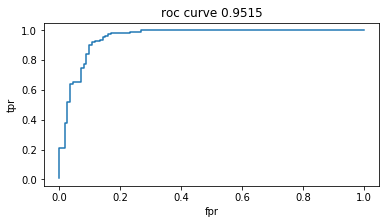

In [88]:
loss, acc = model.evaluate(X_test, y_test, batch_size=10, verbose=1)
print('[INFO] loss, acc', loss, np.round(acc, 6))
print('[INFO] roc auc score {:.4f}'.format(roc_auc_score(y_test, model.predict_proba(X_test))))

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test))
plot_roc(fpr, tpr)
